In [1]:
import pandas as pd
import numpy as np
import re
import time
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("startup_funding.csv")

In [3]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 102.0+ KB


In [5]:
data = data.drop(['Remarks'], axis=1)
data = data.drop(['SNo'], axis=1)

In [6]:
data['AmountInUSD'] = data['AmountInUSD'].apply(lambda x: float(str(x).replace(",", "")))
data['AmountInUSD'] = pd.to_numeric(data['AmountInUSD'])

In [7]:
data['Date'] = data['Date'].str.replace('//', '/').str.replace('.', '/')
# data['Date'].apply(lambda x: re.split('[^0-9]', str(x)))
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

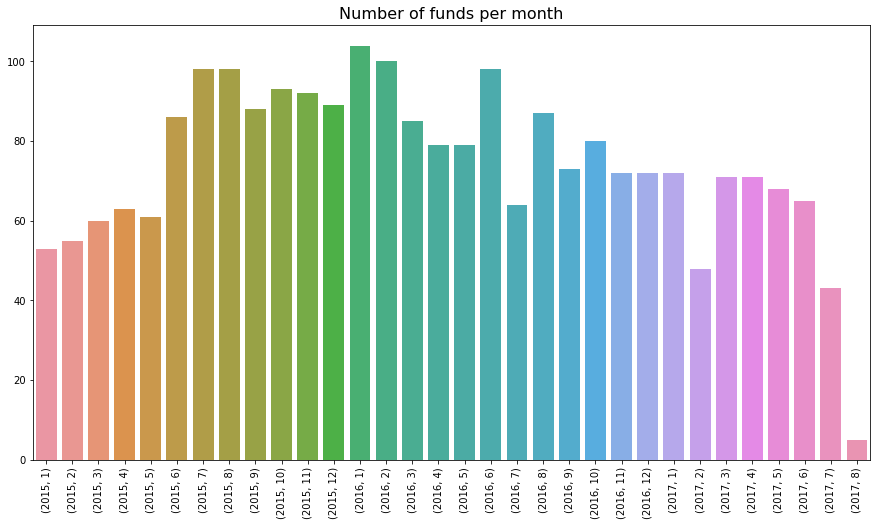

In [22]:
tmp = data.groupby(by=[data.Date.dt.year, data.Date.dt.month])['StartupName'].count()

plt.figure(figsize=(15,8))
sns.barplot(tmp.index, tmp.values)
plt.xticks(rotation='vertical')
plt.title("Number of funds per month", fontsize=16)
plt.show()

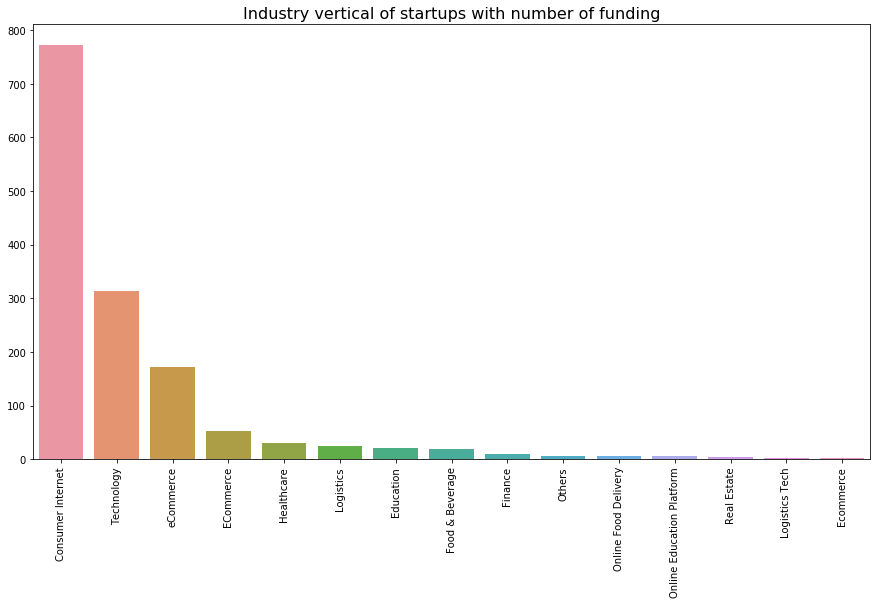

In [9]:
industry = data['IndustryVertical'].value_counts().head(15)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values)
plt.xticks(rotation='vertical')
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

#Consumer internet and Technology are most popular

In [10]:
ECommerce = data[data['IndustryVertical'] == 'ECommerce']
eCommerce = data[data['IndustryVertical'] == 'eCommerce']
pd.merge(ECommerce,eCommerce, on='SubVertical')

#it can be a typo and we need to substitute eCommerce with ECommerce

,Date_x,StartupName_x,IndustryVertical_x,SubVertical,CityLocation_x,InvestorsName_x,InvestmentType_x,AmountInUSD_x,Date_y,StartupName_y,IndustryVertical_y,CityLocation_y,InvestorsName_y,InvestmentType_y,AmountInUSD_y
0,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,2016-08-30,Paytm,eCommerce,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
1,2017-03-03,Paytm Marketplace,ECommerce,ECommerce Marketplace,Bangalore,Alibaba,Private Equity,2.000000e+08,2017-03-21,Flipkart,eCommerce,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
2,2016-01-12,Shopclues,ECommerce,ECommerce Marketplace,Gurgaon,"GIC, Tiger Global Management, Nexus Venture Pa...",Private Equity,1.000000e+08,2017-03-21,Flipkart,eCommerce,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
3,2017-03-28,Fynd,ECommerce,Online fashion marketplace,Mumbai,Venture Catalysts,Private Equity,5.000000e+05,2017-04-26,StalkBuyLove,eCommerce,New Delhi,Trifecta Capital,Private Equity,1.000000e+06
4,2017-02-17,Urban Ladder,ECommerce,Online Furniture Store,Bangalore,"Kalaari Capital, SAIF Partners, Steadview Capi...",Private Equity,1.520000e+07,2016-08-24,UrbanLadder,eCommerce,Mumbai,Trifecta Capital,Private Equity,3.000000e+06
5,2016-03-14,PinkBlue,ECommerce,Medical Supplies eTailer,Bangalore,"Hari Krishna, Ajay Modani, Dr V Ravinder, Anir...",Seed Funding,2.236080e+05,2016-05-04,MyDentistChoice,eCommerce,Hyderabad,Undisclosed investors,Seed Funding,1.500000e+05


In [11]:
data = data.replace({'eCommerce' : 'ECommerce'})
data.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


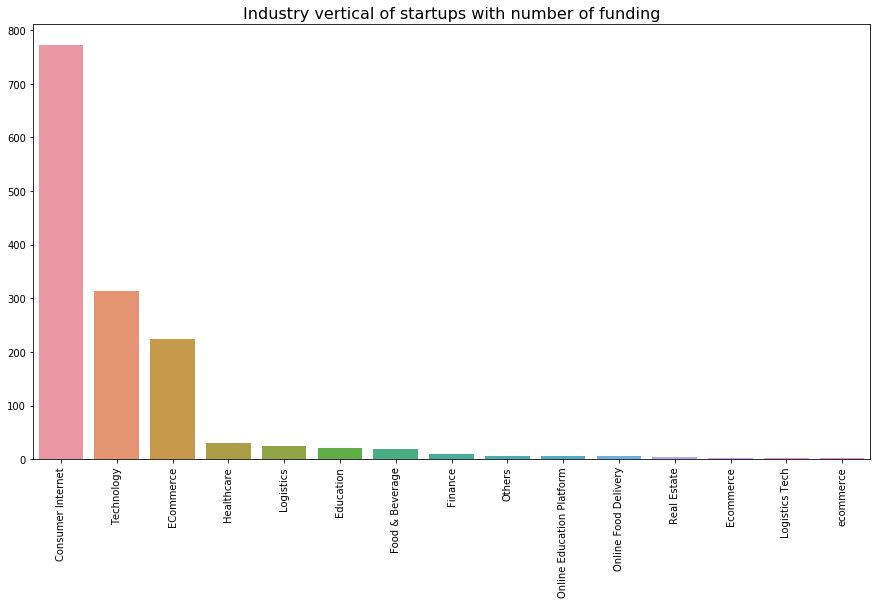

In [12]:
industry = data['IndustryVertical'].value_counts().head(15)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values)
plt.xticks(rotation='vertical')
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

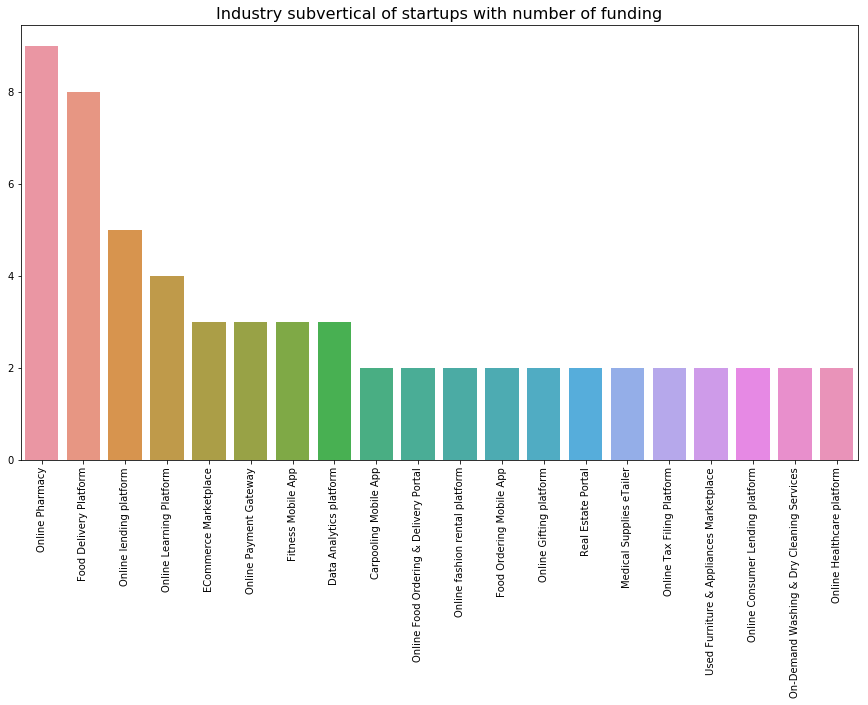

In [13]:
industry = data['SubVertical'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values)
plt.xticks(rotation='vertical')
plt.title("Industry subvertical of startups with number of funding", fontsize=16)
plt.show()

#Online Pharmacy and Food Delivery Platform are most popular

In [14]:
data.InvestmentType.value_counts()
data['InvestmentType'] = data['InvestmentType'].str.replace('SeedFunding', 'Seed Funding'
                                              ).str.replace('PrivateEquity', 'Private Equity')

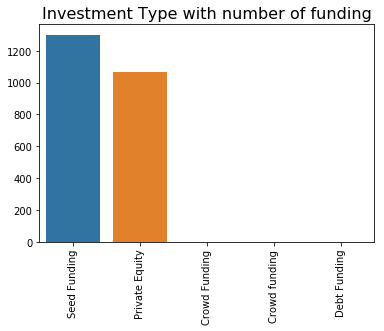

In [15]:
funds = data['InvestmentType'].value_counts()
sns.barplot(funds.index, funds.values)
plt.xticks(rotation='vertical')
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

In [16]:
data.describe()

,AmountInUSD
count,1.525000e+03
mean,1.203107e+07
std,6.403118e+07
min,1.600000e+04
25%,3.700000e+05
50%,1.070000e+06
75%,6.000000e+06
max,1.400000e+09


In [17]:
data[data['AmountInUSD'] == 1.400000e+09]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
294,2017-03-21,Flipkart,ECommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09


In [18]:
data[data['AmountInUSD'] == 1.600000e+04]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
2345,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2346,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2347,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2348,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2349,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0


In [19]:
data[data['InvestorsName'] == 'Hyderabad Angels (at Startup Heroes event)']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
2345,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2346,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2347,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2348,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2349,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0


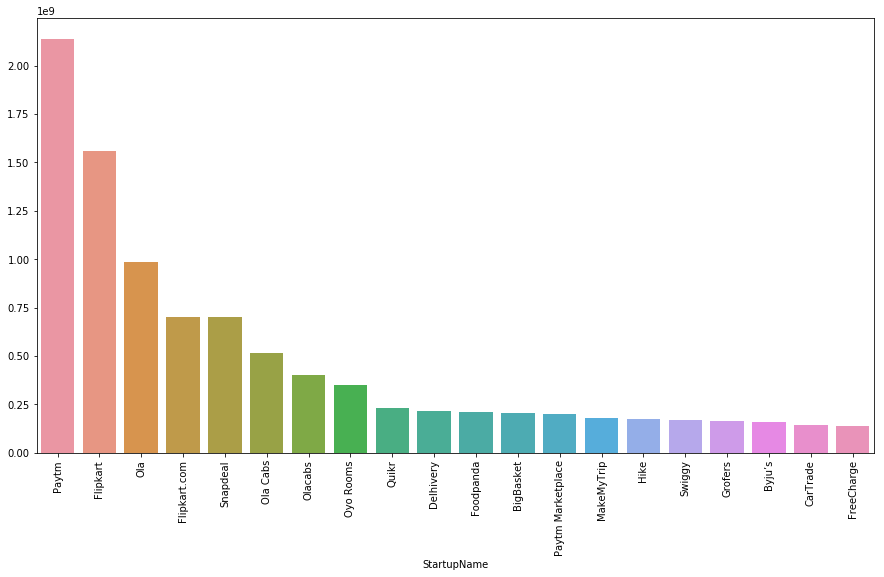

In [20]:
plt.figure(figsize=(15,8))
startup_funds = data.groupby(['StartupName'])['AmountInUSD'].agg(np.sum).sort_values(ascending = False).head(20)
sns.barplot(startup_funds.index, startup_funds.values)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
Paytm = data[data['StartupName'] == 'Paytm']
Flipkart = data[data['StartupName'] == 'Flipkart']
Ola = data[data['StartupName'] == 'Ola']

temp = [Paytm, Flipkart, Ola]
pd.concat(temp)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
821,2016-08-30,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
1787,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08
2218,2015-03-13,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN
2276,2015-02-05,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN
101,2017-06-26,Flipkart,ECommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07
294,2017-03-21,Flipkart,ECommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
360,2017-02-20,Flipkart,ECommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07
2017,2015-06-04,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07
76,2017-06-14,Ola,Consumer Internet,Cab Aggregation App,Bangalore,Tekne Capital Management LLC,Private Equity,5.000000e+07
